In [10]:
import pandas as pd
import numpy as np
import magic
from matplotlib import pyplot as plt
import importlib
%matplotlib inline
importlib.reload(magic)
import seaborn as sns

In [2]:
csv_file = 'historical_3.csv'

In [4]:
runner = magic.Fluent()
(runner
     .create_historical_players(4)
     .battles_on_map('gothenburg-sparse.json', 16, 30)
     .battles_on_map('gothenburg-sparse.json', 12, 30)
     .battles_on_map('gothenburg-sparse.json', 8, 30)
     .battles_on_map('edinburgh-sparse.json', 16, 30)
     .battles_on_map('edinburgh-sparse.json', 12, 30)
     .battles_on_map('edinburgh-sparse.json', 8, 30)
     .battles_on_map('boston-sparse.json',8,30)
     .battles_on_map('boston-sparse.json',6,30)
     .battles_on_map('boston-sparse.json',4,30)
     .battles_on_map('boston-sparse.json',2,30)
     .battles_on_map('tube.json',8,30)
     .battles_on_map('tube.json',6,30)
     .battles_on_map('tube.json',4,30)
     .battles_on_map('tube.json',2,30)
     .experiment('Historical')
     .run().dump().store_pointwise(csv_file)
)

sending 419                                 


In [16]:

data = pd.read_csv(csv_file, index_col=False)

data['tournament'] = data.tournament_scores/data.num_players
data['effectiveness'] = np.log(data.scores+1)/np.log(data.map_rivers_count/data.num_players)


In [4]:
data

,game_number,server_name,scores,ranking,tournament_scores,num_players,map,map_rivers_count,map_sites_count,name,Age,tournament,effectiveness
0,0,MaxReachableVertexWeightAi,33478,1,15,16,gothenburg-sparse.json,2234,1175,Age0,0.0,0.9375,2.109487
1,0,ConnectClosestMinesAi,69171,11,5,16,gothenburg-sparse.json,2234,1175,Age2,2.0,0.3125,2.256417
2,0,MaxReachableVertexWeightAi,28012,9,7,16,gothenburg-sparse.json,2234,1175,Age0,0.0,0.4375,2.073397
3,0,ConnectClosestMinesAi,33157,0,16,16,gothenburg-sparse.json,2234,1175,Age2,2.0,1.0000,2.107537
4,0,LochKillerAi,11647,3,13,16,gothenburg-sparse.json,2234,1175,Age1,1.0,0.8125,1.895721
5,0,ConnectClosestMinesAi,19937,7,9,16,gothenburg-sparse.json,2234,1175,Age2,2.0,0.5625,2.004548
6,0,ConnectClosestMinesAi,30618,6,10,16,gothenburg-sparse.json,2234,1175,Age2,2.0,0.6250,2.091407
7,0,MaxReachableVertexWeightAi,32136,2,14,16,gothenburg-sparse.json,2234,1175,Age0,0.0,0.8750,2.101204
8,0,MaxReachableVertexWeightAi,26498,8,8,16,gothenburg-sparse.json,2234,1175,Age0,0.0,0.5000,2.062147
9,0,MaxReachableVertexWeightAi,50776,14,2,16,gothenburg-sparse.json,2234,1175,Age0,0.0,0.1250,2.193822


D:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


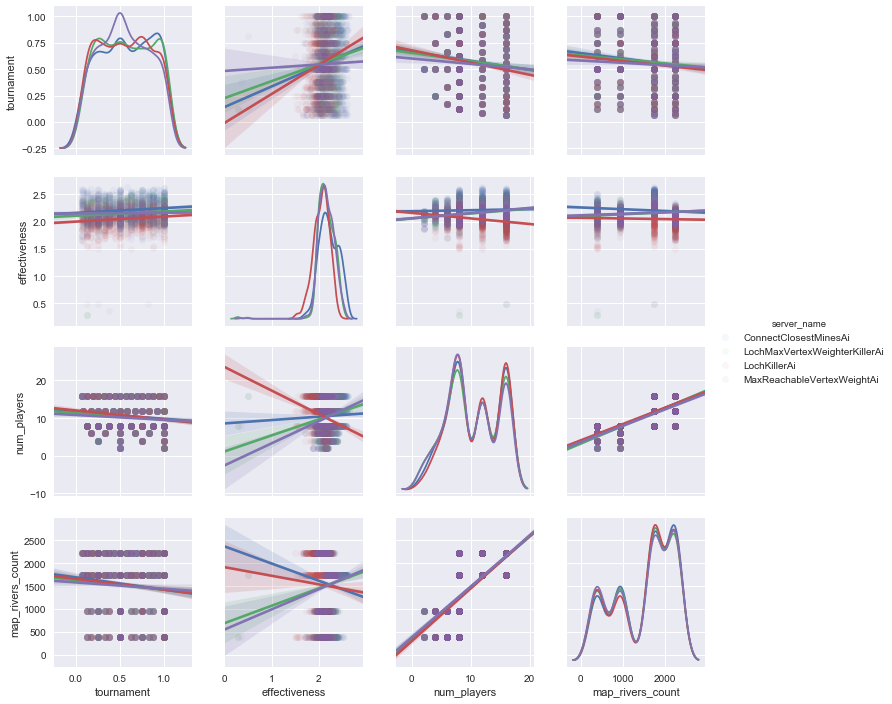

In [23]:
sns.pairplot(
    data,
    vars=['tournament','effectiveness','num_players','map_rivers_count'],
    hue='server_name',
    kind='reg',
    diag_kind='kde',
    plot_kws={ 'scatter_kws' : {'alpha' : 0.05}})

In [7]:
winners = (data
 .groupby(['num_players','map_rivers_count','server_name'])
 .mean()
 .loc[:,'tournament']
 .reset_index()
 .groupby(['num_players','map_rivers_count'])
 .apply(lambda x : x.sort_values('tournament',ascending=False).iloc[0]['server_name'])
 .to_frame('winner')
     .reset_index()
 )


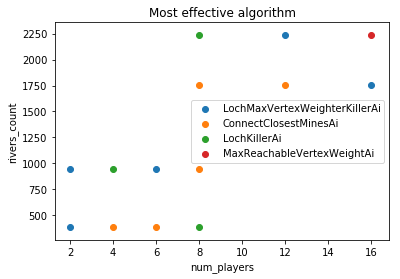

In [8]:
for winner in winners.winner.unique():
    s = winners.loc[winners.winner == winner]
    plt.scatter(
        s.num_players,
        s.map_rivers_count,
        label = winner
    )
plt.legend()
plt.xlabel('num_players')
plt.ylabel('rivers_count')
plt.title('Most effective algorithm')